In [1]:
%pwd

'C:\\Users\\admin\\Documents\\GitHub\\SSAC\\crawling'

In [2]:
#최근 7일간 국내발생 및 해외유입 코로나 신규 확진자 수
#코로나 현황
from selenium import webdriver
from bs4 import BeautifulSoup
driver = webdriver.Chrome('./chromedriver.exe')
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%BD%94%EB%A1%9C%EB%82%98+%ED%98%84%ED%99%A9&oquery=%EC%BD%94%EB%A1%9C%EB%82%98+%ED%99%95%EC%A7%84%EC%9E%90&tqi=hfUzrwprvmsssiDUS%2FdssssstiC-446223'

driver.get(url)
#코로나 현황 쿼리가 날려진 네이버 결과 페이지 

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/92.0.4515.159 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="코로나 현황 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'코로나 현황'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'코로나 현황'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>코로나 현황 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link
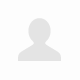
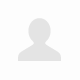
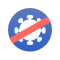
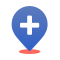
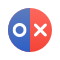
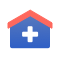

In [39]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup
#print('깔-끔')

In [42]:
#click ver
#사용자 도구(ctrl+shitf+c)에서 찾고자 하는 대상에 브라우저를 기준으로 커서를 대면 요소 알아서 찾아줌
#사용자 도구에서 원하는 요소에 커서를 대고 마우스 오른쪽 버튼 > copy > selector copy가능
#css selector 기준으로 버튼도 누를 수 있음 

#클릭할 수 있게 바 요소 추출
#target2 > dl > div:nth-child(1) > dd:nth-child(2) > span 첫번째 바 (오늘로부터 일주일 전)
#target2 > dl > div:nth-child(2) > dd:nth-child(2) > span 두번째 바
#target2 > dl > div:nth-child(3) > dd:nth-child(2) > span 세번째 바
#target2 > dl > div:nth-child(4) > dd:nth-child(2) > span 네번째 바
#target2 > dl > div:nth-child(5) > dd:nth-child(2) > span 다섯번째 바
#target2 > dl > div:nth-child(6) > dd:nth-child(2) > span 여섯번째 바 
#target2 > dl > div:nth-child(7) > dd:nth-child(2) > span 일곱번째 바 (오늘)

#클릭방법 예시
"""
now=driver.find_element_by_css_selector('#target2 > dl > div:nth-child(1) > dd:nth-child(2) > span > span')
now.click()
"""

#텍스트 추출도 가능(번외)

ll=driver.find_element_by_css_selector('#target2 > dl > div.column._column.-point > dd:nth-child(2) > span > span')
print(ll.text)

print('#')
print('')

1,882
#



# 예시 (CSS_selector 출력)
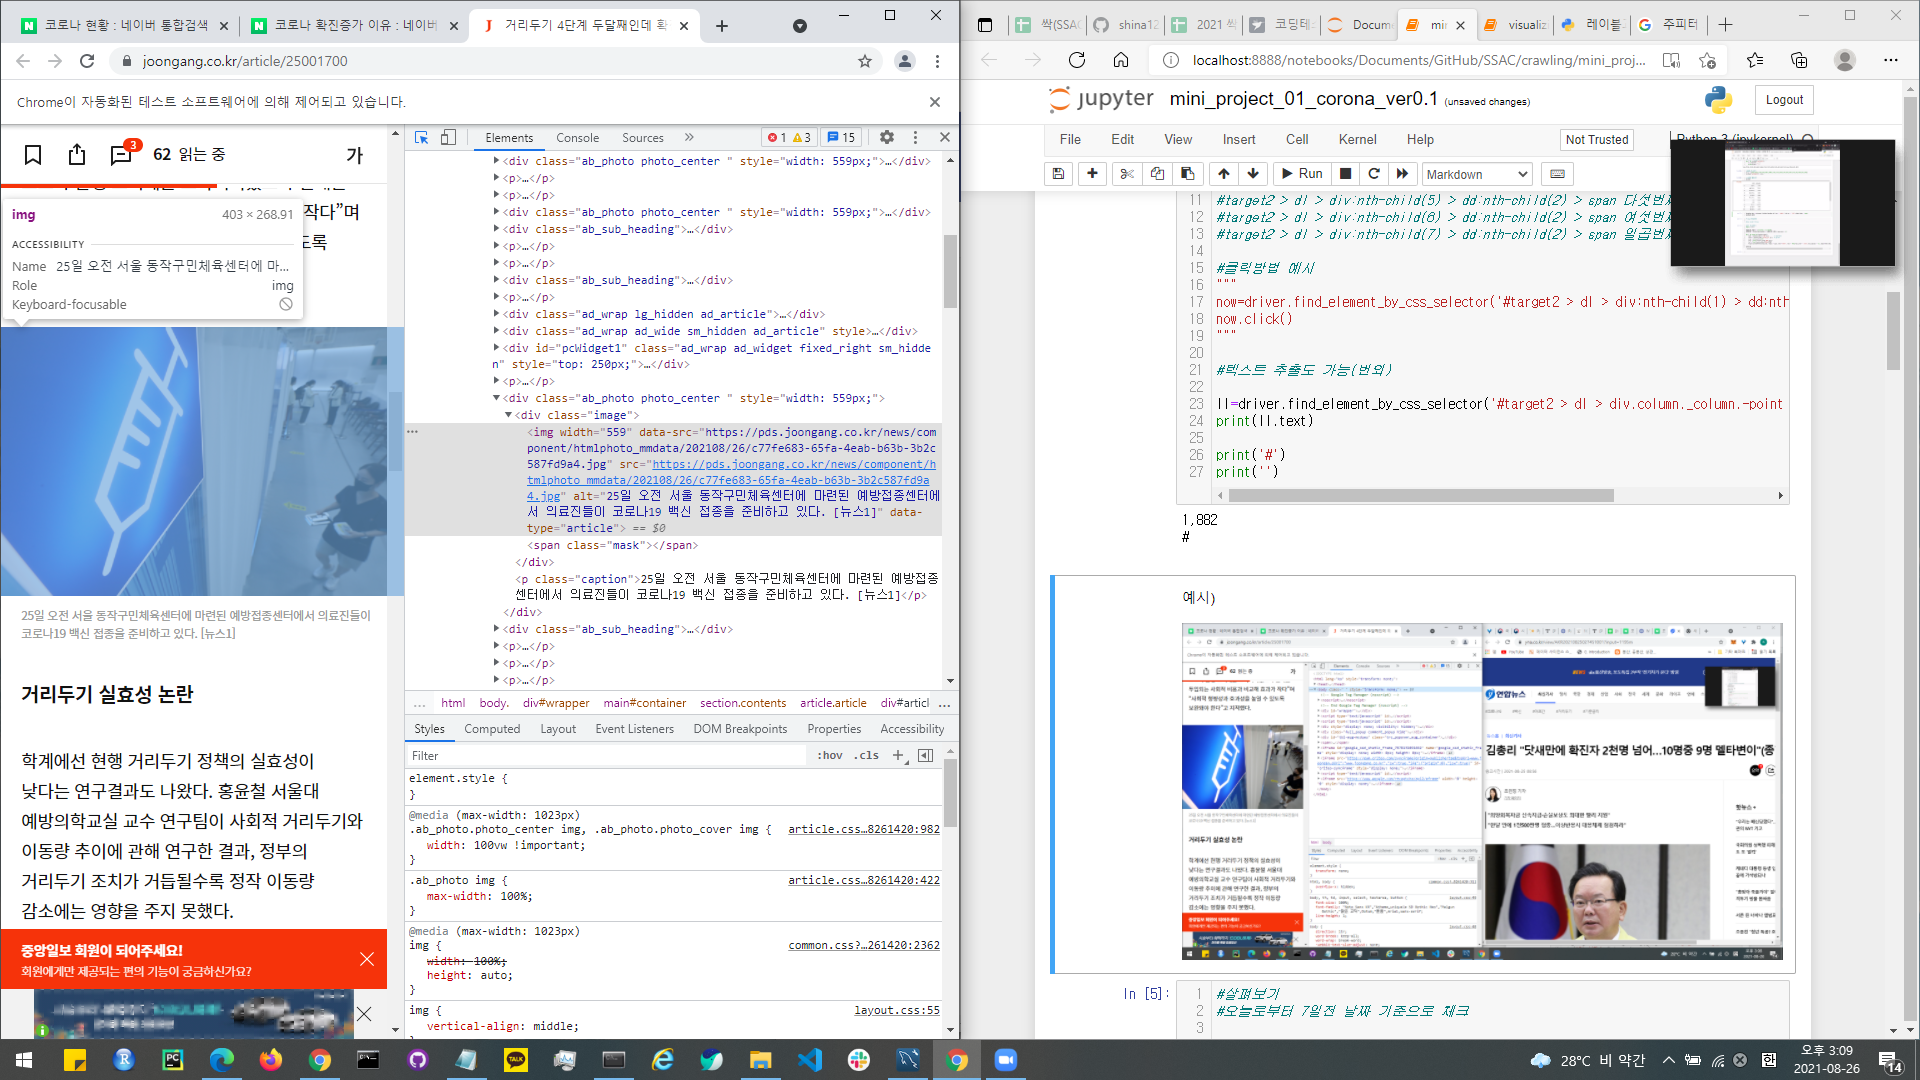

In [5]:
#살펴보기
#오늘로부터 7일전 날짜 기준으로 체크

#div:nth-child(n)변경
now=driver.find_element_by_css_selector('#target2 > dl > div:nth-child(1) > dd:nth-child(2) > span > span')
now.click()

#날짜 
find_text_date=driver.find_element_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div:nth-child(5) > div._normality > div.confirmed_status.new > div > div.tooltip_area._tooltip_wrapper > dl > div:nth-child(1) > dd.date._x_value') 
#국내빌생
find_text_in=driver.find_element_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div:nth-child(5) > div._normality > div.confirmed_status.new > div > div.tooltip_area._tooltip_wrapper > dl > div:nth-child(2) > dd.desc._y_first_value')
#해외유입
find_text_out=driver.find_element_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div:nth-child(5) > div._normality > div.confirmed_status.new > div > div.tooltip_area._tooltip_wrapper > dl > div:nth-child(2) > dd.desc._y_second_value')
#신규 확진자 수
find_text_total=driver.find_element_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div:nth-child(5) > div._normality > div.confirmed_status.new > div > div.tooltip_area._tooltip_wrapper > dl > div:nth-child(1) > dd.desc_em._total')
print("오늘 날짜:", find_text_date.text)
print("국내발생:",find_text_in.text)
print("국외발생:",find_text_out.text)
print("신규_확진자_수:",find_text_total.text)
#확인완료

오늘 날짜: 8.19
국내발생: 1,999
국외발생: 51
신규_확진자_수: 2,050


In [8]:
#날짜변환_DATE
"""
import datetime 

from dateutil.parser import parse
text_date=driver.find_element_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div:nth-child(5) > div._normality > div.confirmed_status.new > div > div.tooltip_area._tooltip_wrapper > dl > div:nth-child(1) > dd.date._x_value').text 
plus_year='2021.'+text_date
year_date =parse(plus_year).date()
year_date
str(year_date)
"""
#날짜 변환
import datetime 
from dateutil.parser import parse
#text_date
text_date=driver.find_element_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div:nth-child(5) > div._normality > div.confirmed_status.new > div > div.tooltip_area._tooltip_wrapper > dl > div:nth-child(1) > dd.date._x_value').text 

plus_year='2021.'+text_date
year_date =parse(plus_year).date()
year_date


datetime.date(2021, 8, 19)

In [44]:
#정리
import datetime 
from dateutil.parser import parse

text_date_l=[]
text_in_l=[]
text_out_l=[]
text_total_l=[]
for day in range(1,8): #일주일을 뽑을 것이기 때문
    #div:nth-child(n)변경
    #f로 포맷팅
    now=driver.find_element_by_css_selector(f'#target2 > dl > div:nth-child({day}) > dd:nth-child(2) > span > span')
    now.click()
    #날짜 
    text_date=driver.find_element_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div:nth-child(5) > div._normality > div.confirmed_status.new > div > div.tooltip_area._tooltip_wrapper > dl > div:nth-child(1) > dd.date._x_value').text 
    plus_year = '2021.'+text_date
    year_date = parse(plus_year).date()
    #year_date = str(year_date)
    text_date_l.append(year_date)
    #국내빌생
    text_in=driver.find_element_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div:nth-child(5) > div._normality > div.confirmed_status.new > div > div.tooltip_area._tooltip_wrapper > dl > div:nth-child(2) > dd.desc._y_first_value').text
    text_in=text_in.replace(',', '')
    text_in_l.append(int(text_in))
    #해외유입
    text_out=driver.find_element_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div:nth-child(5) > div._normality > div.confirmed_status.new > div > div.tooltip_area._tooltip_wrapper > dl > div:nth-child(2) > dd.desc._y_second_value').text
    text_out_l.append(int(text_out))
    #일별 신규 확진자 수
    find_text_total=driver.find_element_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div:nth-child(5) > div._normality > div.confirmed_status.new > div > div.tooltip_area._tooltip_wrapper > dl > div:nth-child(1) > dd.desc_em._total').text
    find_text_total=find_text_total.replace(',', '')
    text_total_l.append(int(find_text_total))

# 예시 (날짜별 바)
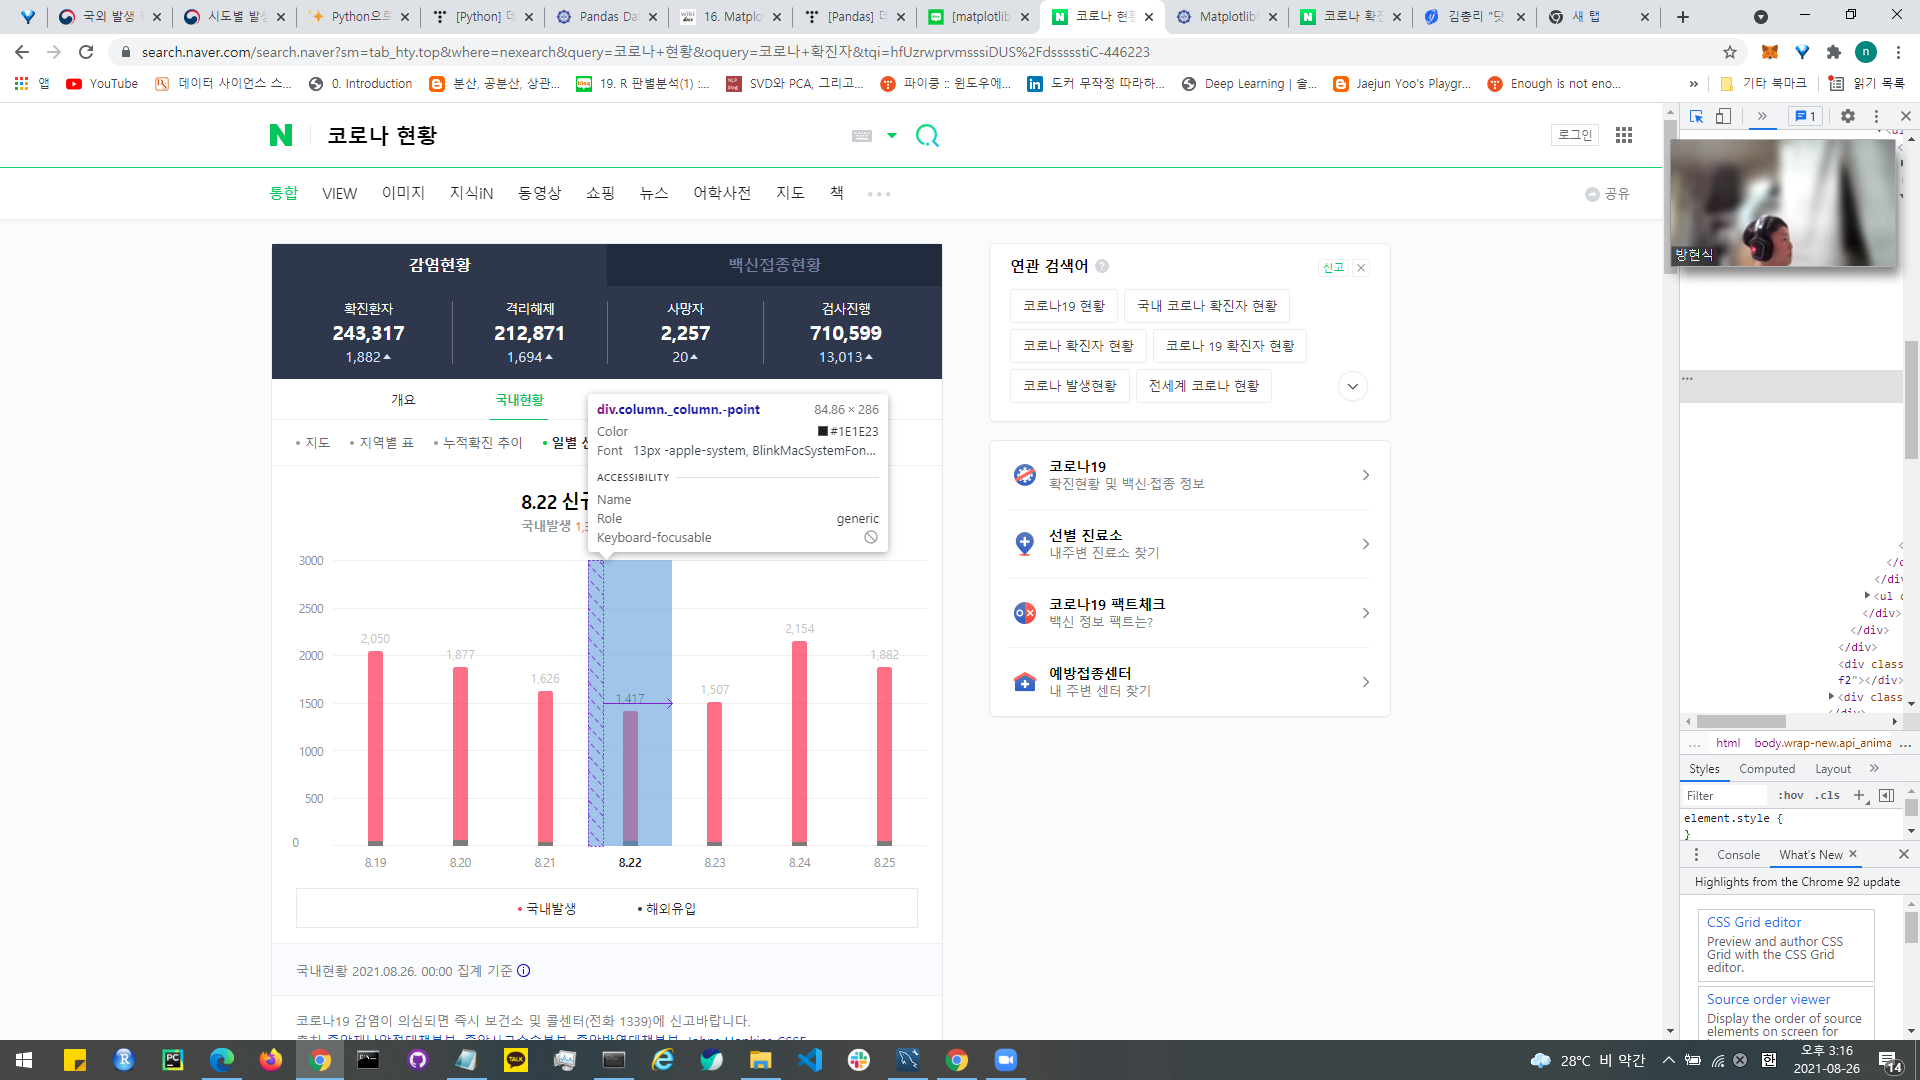

In [46]:
type(now)

selenium.webdriver.remote.webelement.WebElement

In [45]:
#확인
print(text_date_l)
print(text_in_l)
print(text_out_l)
print(text_total_l)

[datetime.date(2021, 8, 19), datetime.date(2021, 8, 20), datetime.date(2021, 8, 21), datetime.date(2021, 8, 22), datetime.date(2021, 8, 23), datetime.date(2021, 8, 24), datetime.date(2021, 8, 25)]
[1999, 1811, 1588, 1369, 1468, 2113, 1829]
[51, 66, 38, 48, 39, 41, 53]
[2050, 1877, 1626, 1417, 1507, 2154, 1882]


In [11]:
#리스트를 df으로 만들기
import pandas as pd

mk_df= pd.DataFrame({'일자':text_date_l, '국내발생':text_in_l, '해외유입':text_out_l,'신규_확진자_수':text_total_l})
mk_df

,일자,국내발생,해외유입,신규_확진자_수
0,2021-08-19,1999,51,2050
1,2021-08-20,1811,66,1877
2,2021-08-21,1588,38,1626
3,2021-08-22,1369,48,1417
4,2021-08-23,1468,39,1507
5,2021-08-24,2113,41,2154
6,2021-08-25,1829,53,1882


In [13]:
#xlsx로 저장
#mk_df.to_excel('C:/Users/admin/Downloads/week.xlsx', index=False)
mk_df.to_excel('C:/Users/admin/Downloads/week_date_ver.xlsx', index=False)

In [540]:
#mysql DB에 corona DB 생성해두기
#워크벤치에서 
#CREATE DATABASE CORONA_test

In [14]:
#데이터베이스에 연결
import pymysql
conn= pymysql.connect(host='127.0.0.1', user='root', password='1234',
                     db='CORONA_test', charset='utf8')

In [15]:
#커서 생성
cur = conn.cursor()

In [16]:
#테이블 만들기
#국내발생은 전체 국민수 자릿수로 지정
#cur.execute("CREATE TABLE IF NOT EXISTS CORONA_test1 (DATE varchar(10), domestic int(8), global int(4), total_count int(8))")
cur.execute("DROP TABLE IF EXISTS CORONA_test1")
"""
##EOF에러
cur.execute("CREATE TABLE IF NOT EXISTS CORONA_test1(날짜 varchar(10), \
                                                     국내발생 int(8), \
                                                     해외유입 int(4), \
                                                     신규합계 int(8))")
"""
cur.execute("CREATE TABLE IF NOT EXISTS CORONA_test1(날짜 varchar(10), 국내발생 int(8), 해외유입 int(4),신규합계 int(8))")


0

In [17]:
conn.commit()

In [18]:
#데이터베이스에 넣을 데이터프레임 불러오기
import pandas as pd
df_1=pd.read_excel('C:/Users/admin/Downloads/week.xlsx')
#df_1=pd.read_excel('C:/Users/admin/Downloads/week_date_ver.xlsx')

In [19]:
df_1

,DATE,국내발생,해외유입,신규_확진자_수
0,2021-08-19,1999,51,2050
1,2021-08-20,1811,66,1877
2,2021-08-21,1588,38,1626
3,2021-08-22,1369,48,1417
4,2021-08-23,1468,39,1507
5,2021-08-24,2113,41,2154
6,2021-08-25,1829,53,1882


In [20]:
#확인
for i in range(0,len(df_1)):
    a =df_1.loc[i][0]
    b =df_1.loc[i][1]
    c =df_1.loc[i][2]
    d =df_1.loc[i][3]
    print(a)
    print(b)
    print(c)
    print(d)

2021-08-19
1999
51
2050
2021-08-20
1811
66
1877
2021-08-21
1588
38
1626
2021-08-22
1369
48
1417
2021-08-23
1468
39
1507
2021-08-24
2113
41
2154
2021-08-25
1829
53
1882


In [21]:
###
for i in range(0,len(df_1)):
    a =df_1.loc[i][0]
    b =df_1.loc[i][1]
    c =df_1.loc[i][2]
    d =df_1.loc[i][3]
    cur.execute(f"INSERT INTO corona_test1 VALUES('{a}', {b}, {c}, {d})")
    #INSERT INTO CORONA_TEST1 VALUES('2021-08-24',2114,2154,41)의 형태로 들어가야 함

In [22]:
#DB에 완전히 저장
conn.commit()

In [49]:
#세션 연결 종료
conn.close()

Error: Already closed

# 데이터베이스
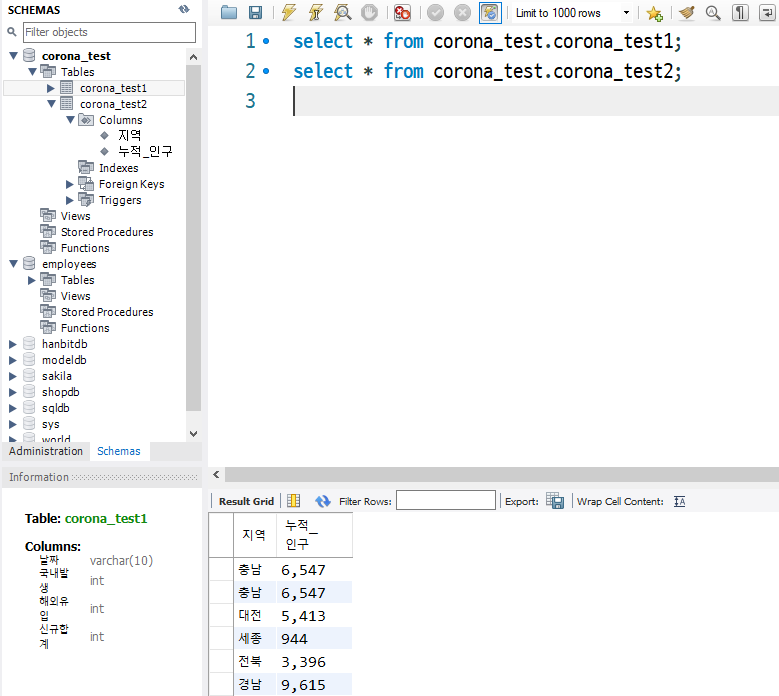

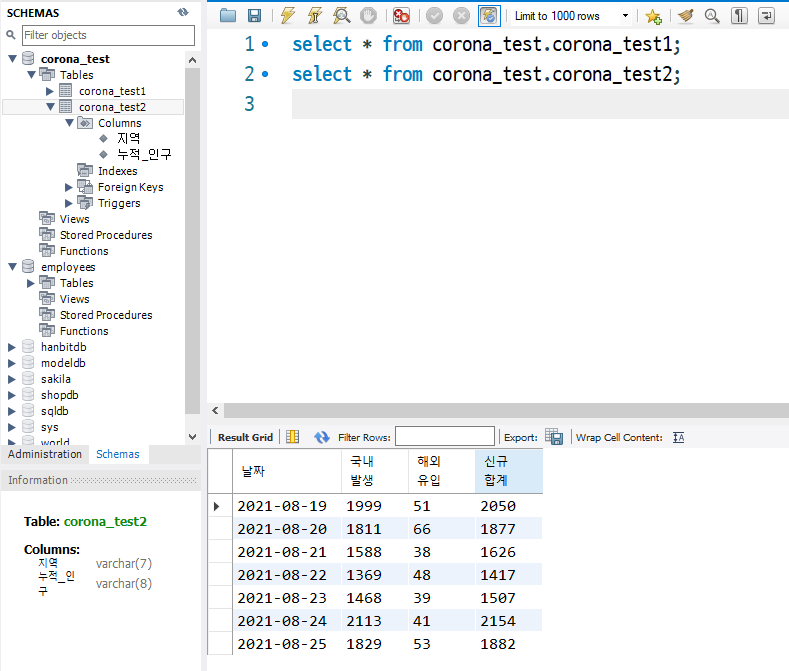

In [24]:
#2번째 bd넣기
%pwd

'C:\\Users\\admin\\Documents\\GitHub\\SSAC\\crawling'

In [25]:
#데이터베이스에 넣을 데이터프레임 불러오기2
import pandas as pd
df_2=pd.read_excel('C:/Users/admin/Downloads/코로나 지역별 누적인구.xlsx')
df_2

,Unnamed: 0,지역,누적 인구
0,0,검역자세히,"5,738"
1,1,제주,"2,494"
2,2,서울,"76,245"
3,3,인천,"11,305"
4,4,광주,"3,920"
5,5,광주,"3,920"
6,6,경북,"6,802"
7,7,부산,"10,999"
8,8,대구,"13,192"
9,9,강원,"5,242"


In [26]:
#맨앞 열과 행 삭제
df_2=df_2.drop(['Unnamed: 0'], axis=1)
df_2=df_2.drop([0], axis=0)
df_2

,지역,누적 인구
1,제주,"2,494"
2,서울,"76,245"
3,인천,"11,305"
4,광주,"3,920"
5,광주,"3,920"
6,경북,"6,802"
7,부산,"10,999"
8,대구,"13,192"
9,강원,"5,242"
10,경기,"68,158"


In [250]:
#마지막 열이 string임
#type(df_2.iloc[0][2])

In [ ]:
#세션 연결 종료
#conn.close()

In [27]:
#pass
#데이터베이스에 연결
import pymysql
conn= pymysql.connect(host='127.0.0.1', user='root', password='1234',
                     db='CORONA_test')

In [28]:
#pass
#커서 생성
cur = conn.cursor()

In [29]:
#테이블 만들기
#국내발생은 전체 국민수 자릿수로 지정
cur.execute('use corona_test')
cur.execute("DROP TABLE IF EXISTS CORONA_test2")
cur.execute("CREATE TABLE IF NOT EXISTS CORONA_test2 (지역 varchar(7), 누적_인구 varchar(8))")

0

In [30]:
conn.commit()

In [35]:
#0부터 시작하면 오류 위에서 0번째 행을 지워줬기 때문
for i in range(1, len(df_2)+1):
    e =df_2.loc[i][0]
    f =df_2.loc[i][1]
    print(e)
    print(f)

제주
2,494
서울
76,245
인천
11,305
광주
3,920
광주
3,920
경북
6,802
부산
10,999
대구
13,192
강원
5,242
경기
68,158
전남
2,479
충북
4,953
충남
6,547
충남
6,547
대전
5,413
세종
944
전북
3,396
경남
9,615
울산
3,997


In [36]:
#데이터 입력
for i in range(1,len(df_2)+1):
    e =df_2.loc[i][0]
    f =df_2.loc[i][1]
    cur.execute(f"INSERT INTO corona_test2 VALUES('{e}', '{f}')")    

In [37]:
conn.commit()

In [38]:
#세션 연결 종료
conn.close()